## Inventory Data Exploratory Data Analysis

### Import Packages

In [1]:
import os
import sys
import pandas as pd

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from utils import plot_bar_graph, plot_histogram, plot_pie_chart, get_chat_completion, plot_top_items

In [2]:
inventory_df = pd.read_csv("../data/Inventory_data.csv")
inventory_df

,renderingcontext,campaign_id,game_key,osfamily,devicetype,devicemake,site_name,matchedfoldposition,browser,impression,engagement,click
0,InApp,s9tv2we,adunit-mouser-user-choice-v2-cpe-av-canada-mpu...,6.0,4.0,Samsung,puzzle.game.find.differences,2,Chrome Mobile WebView,2,1,0
1,Other,a5mcfox,adunit-mouser-user-choice-v2-cpe-av-aus-nz-mob...,6.0,4.0,Samsung,kidadl.com,3,Chrome Mobile,3,2,0
2,InApp,sigze66,adunit-mouser-user-choice-v2-cpe-av-uk-mob/2a9...,6.0,3.0,Samsung,klondike.solitaire.card.games.free.patience.sp...,2,Chrome Mobile WebView,1,0,0
3,MobileOptimizedWeb,s9tv2we,adunit-mouser-user-choice-v2-cpe-av-mpu/2eda24...,6.0,4.0,LG,ballercap.com,4,Facebook,18,3,0
4,Other,sigze66,adunit-mouser-user-choice-v2-cpe-av-uk-mob/2a9...,6.0,4.0,Samsung,www.happyfacts.co,4,Facebook,7,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2975300,Other,p19pznm,99042d81da3ae04232933347e1773bb2/c03c61b41a678...,6.0,4.0,OnePlus,rockhoundresource.com,2,Chrome Mobile,1,0,0
2975301,Other,p19pznm,99042d81da3ae04232933347e1773bb2/c03c61b41a678...,6.0,4.0,Samsung,thebigamerican.wordpress.com,4,Chrome Mobile,1,0,0
2975302,MobileOptimizedWeb,9j2r3sb,022eb226d42d62f6510ce17ccbd60a8b/47b70c69f8117...,6.0,4.0,Vivo,talkingfriends.fandom.com,4,Chrome Mobile,1,0,0
2975303,Other,9j2r3sb,022eb226d42d62f6510ce17ccbd60a8b/47b70c69f8117...,6.0,4.0,OnePlus,vampire-survivors.fandom.com,4,Chrome Mobile,1,0,0


In [3]:
inventory_df.columns

Index(['renderingcontext', 'campaign_id', 'game_key', 'osfamily', 'devicetype',
       'devicemake', 'site_name', 'matchedfoldposition', 'browser',
       'impression', 'engagement', 'click'],
      dtype='object')

#### Campaign Analysis Based on Inventory Data

<Figure size 1000x600 with 0 Axes>

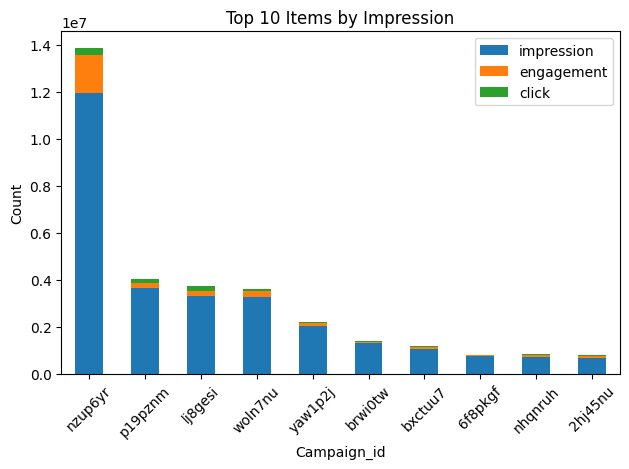

In [6]:
plot_top_items(inventory_df, group_column='campaign_id', metric_column=['impression', 'engagement', 'click'], sort_by="impression", n=10, ascending=False)

<Figure size 1000x600 with 0 Axes>

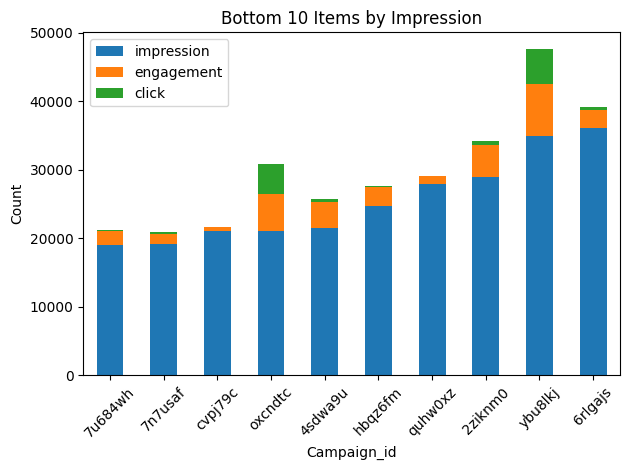

In [5]:
plot_top_items(inventory_df, group_column='campaign_id', metric_column=['impression', 'engagement', 'click'], sort_by="impression", n=10, ascending=True)

#### Operating System Analysis
- Since the osfamily is type numeric, we have to do mapping to the os family string

In [3]:
# Mapping dictionary for osfamily
os_family_mapping = {
    1: 'Other',
    2: 'Windows',
    3: 'OS X',
    4: 'Linux',
    5: 'iOS',
    6: 'Android',
    7: 'Windows Phone'
}

# Map numerical values to categories
inventory_df['osfamily'] = inventory_df['osfamily'].map(os_family_mapping)

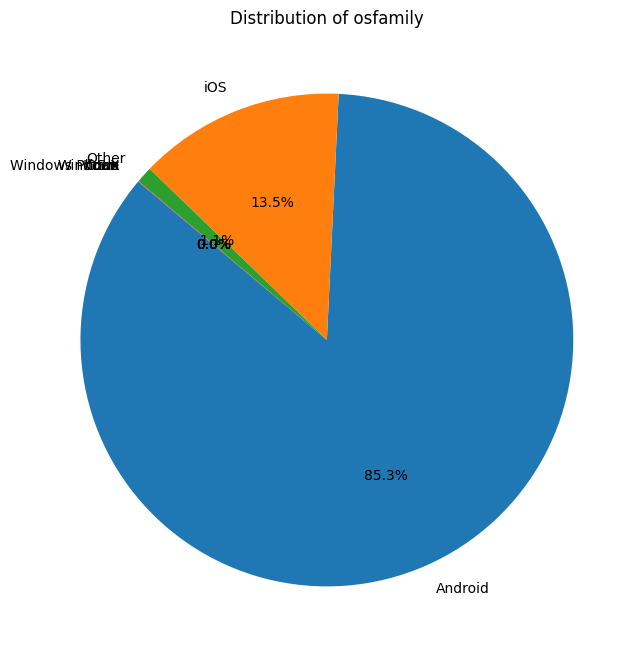

In [4]:
plot_pie_chart(inventory_df['osfamily'], 'osfamily')

- The inventory data exhibits a dominance of Android devices, followed by iOS and Other categories.  <br/>
Less common are Linux, Windows, and OS X, with Windows Phone being the least prevalent.

#### Device Type Analysis
- Since the device type is type numeric, we have to do mapping to the device type string

In [6]:
# Mapping dictionary for devicetype
device_type_mapping = {
    1: 'Other',
    2: 'PC',
    3: 'Tablet',
    4: 'Mobile',
    5: 'Roku',
    6: 'ConnectedTV',
    7: 'OutOfHome',
    8: 'HomeAssistant'
}

# Map numerical values to categories
inventory_df['devicetype'] = inventory_df['devicetype'].map(device_type_mapping)

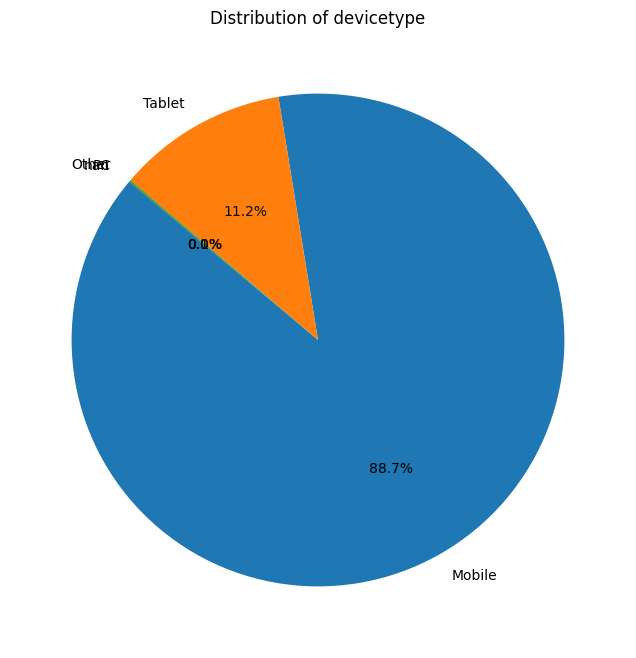

In [7]:
plot_pie_chart(inventory_df['devicetype'], 'devicetype')

- The distribution of device types in the inventory data reveals that Mobile devices constitute <br/>
the majority, followed by Tablet. Other device types are less common, including PC.








#### Fold Position Analysis

In [17]:
# Mapping dictionary for fold position
foldposition_mapping = {
    1: 'Any',
    2: 'Above',
    3: 'Below',
    4: 'Unknown'
}

# Map numerical values to categories
inventory_df['matchedfoldposition'] = inventory_df['matchedfoldposition'].map(foldposition_mapping)

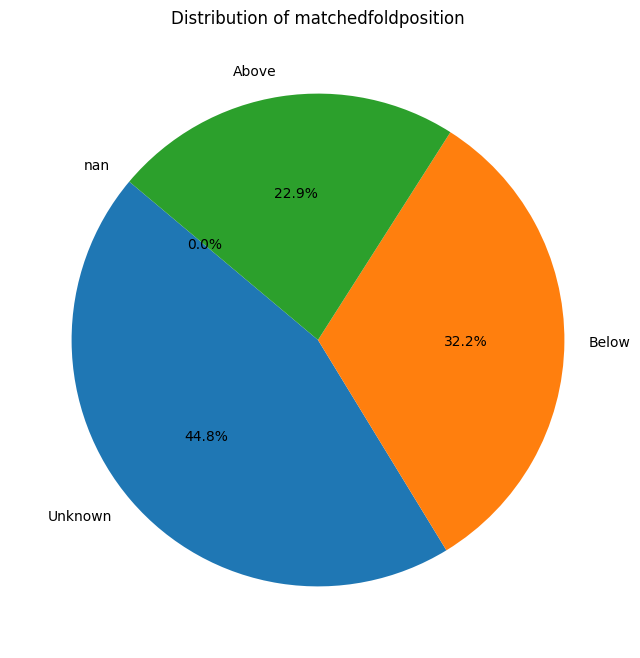

In [18]:
plot_pie_chart(inventory_df['matchedfoldposition'], 'matchedfoldposition')

#### Rendering Context Analysis

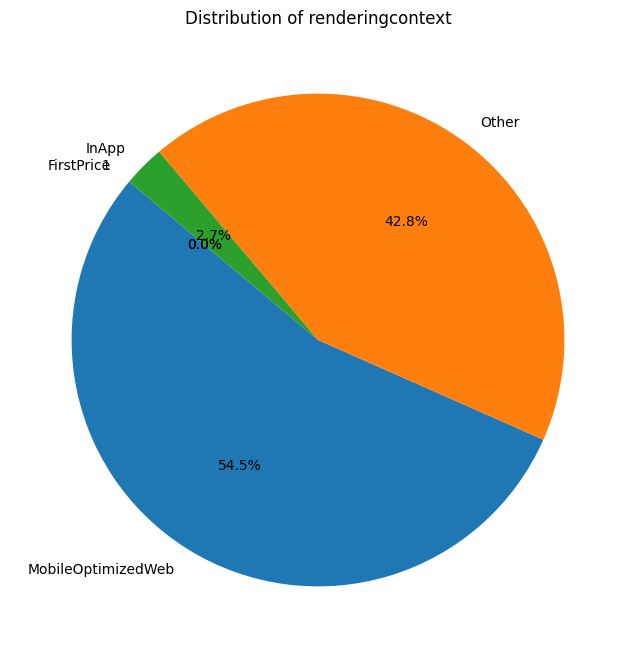

In [20]:
plot_pie_chart(inventory_df['renderingcontext'], 'renderingcontext')

#### Top 5 Browsers

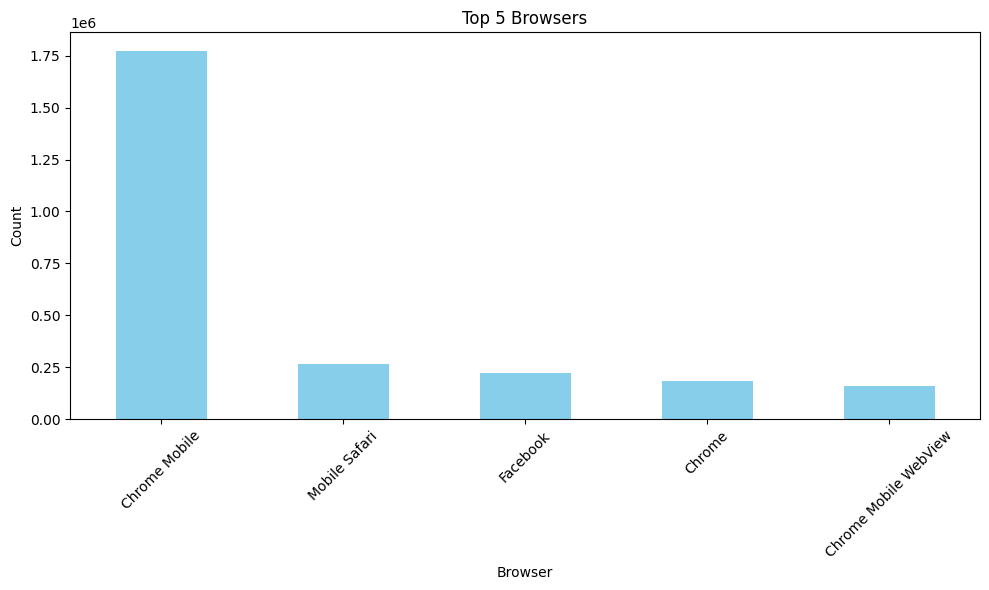

In [26]:
import matplotlib.pyplot as plt

# Get the top 10 browsers based on count
top_browsers = inventory_df['browser'].value_counts().head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_browsers.plot(kind='bar', color='skyblue')
plt.title('Top 5 Browsers')
plt.xlabel('Browser')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()